<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline

# 1. Entendimiento global



In [21]:
#Cargamos el dataset
Train = pd.read_csv("https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/loan_prediction_train.csv")


In [22]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
Train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Variables categóricas

**Análisis univariado**

In [15]:
#Genero
Train.Gender.value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

<Axes: title={'center': 'Gender'}>

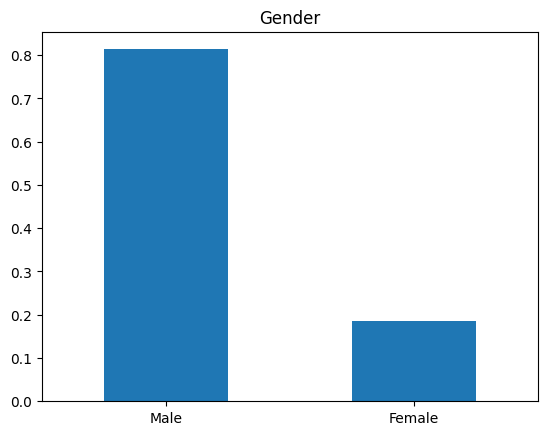

In [30]:
Train.Gender.value_counts(normalize=True).plot.bar(title = "Gender",rot=0)

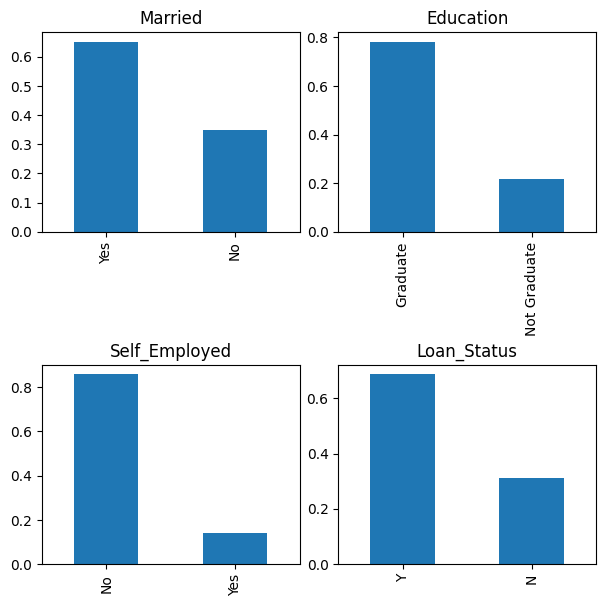

In [38]:
plt.subplot(221)
Train.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married",figsize=(6,6))
plt.tight_layout(pad=0.5)

plt.subplot(222)
Train.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)

plt.subplot(223)
Train.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)

plt.subplot(224)
Train.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)

# Conclusiones

El 80% de los solicitantes de préstamos son hombres en el conjunto de datos de capacitación.
Casi el 70% están casados.
Alrededor del 75% de los solicitantes de préstamos son graduados
Casi el 85-90% de los solicitantes de préstamos trabajan por cuenta propia
El préstamo ha sido aprobado para más del 65% de los solicitantes.

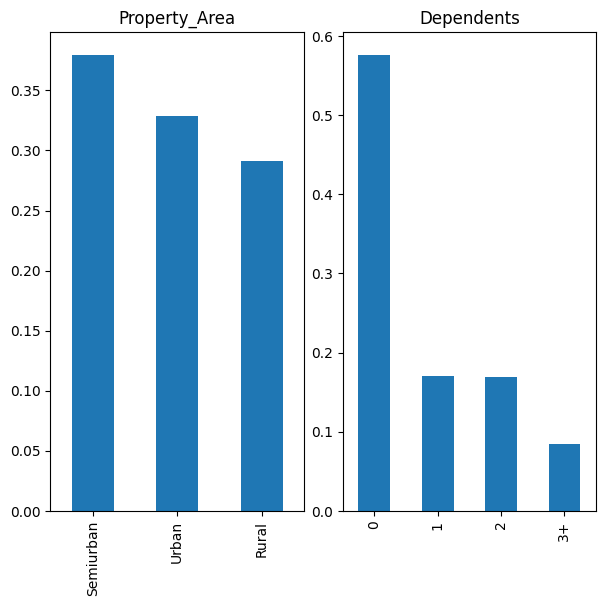

In [40]:
plt.subplot(121)
Train.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area",figsize=(6,6))
plt.tight_layout(pad=0.5)

plt.subplot(122)
Train.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)

Casi el 58% de los solicitantes no tienen dependientes.
El mayor número de solicitantes son de áreas semiurbanas, seguidas de áreas urbanas.

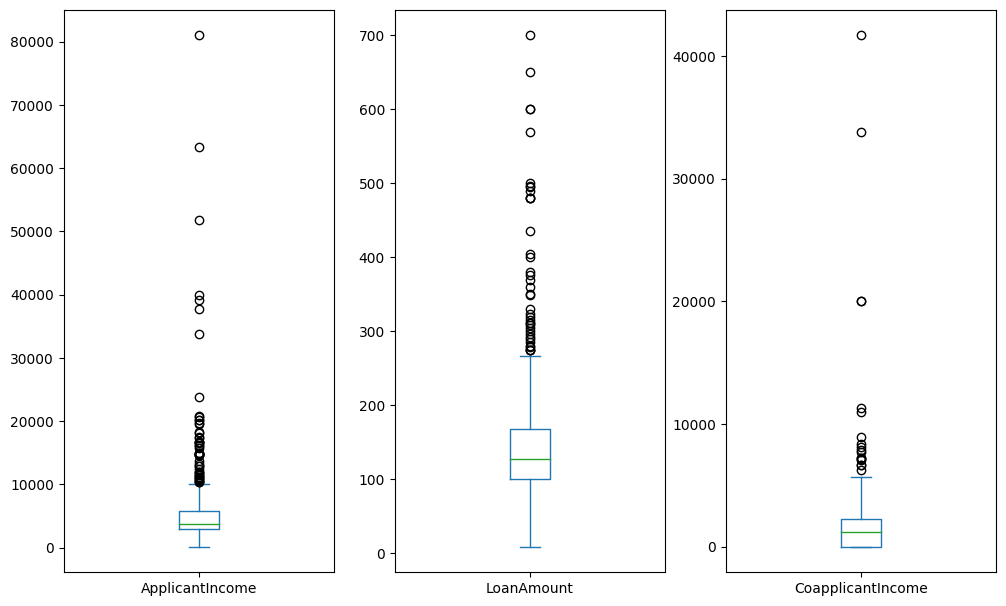

In [41]:


plt.subplot(131)
Train['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

plt.subplot(132)
Train['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
Train['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

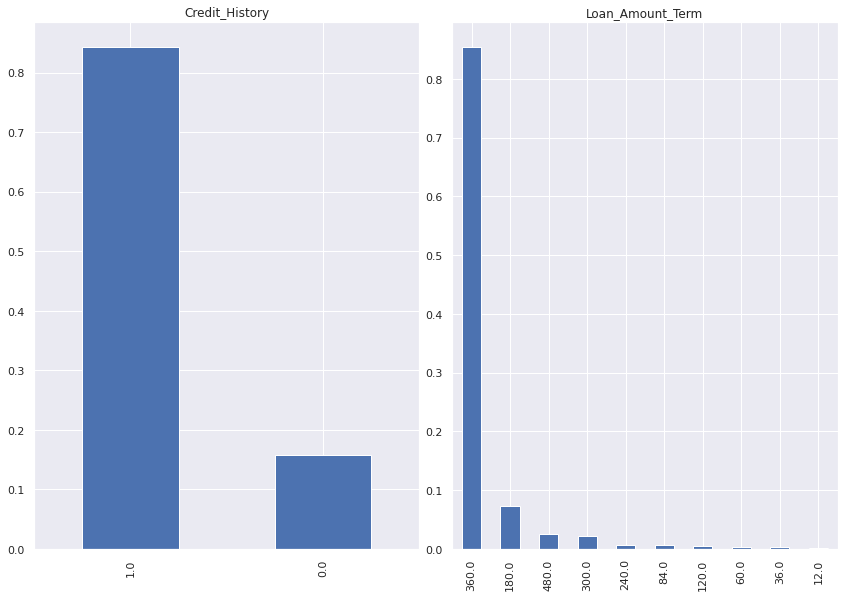

In [ ]:
plt.subplot(121)
Train.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)


plt.subplot(122)
Train.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

# Análisis multivariado


Hipótesis:

* Los solicitantes con mayores ingresos pueden tener más posibilidades de obtener la aprobación .
*Los solicitantes con menos dependientes y mayores ingresos de cosolicitantes podrían tener más posibilidades de obtener aprobaciones de préstamos.
*Los solicitantes que son graduados tienden a ganar más y, por lo tanto, tienen tasas de aprobación de préstamos más altas.
*Los solicitantes que están casados ​​pueden parecer más responsables, por lo tanto, mayores posibilidades de aprobación del préstamo.
*Los solicitantes que no trabajan por cuenta propia pueden tener mayores posibilidades de aprobación del préstamo, ya que tienden a tener una fuente de ingresos constante. Hay menos incertidumbre, diría yo.
*Los candidatos con propiedades en áreas urbanas podrían tener mayores posibilidades de aprobación del préstamo, ya que el costo de la garantía sería alto.
*Un buen historial crediticio definitivamente debe correlacionarse con la aprobación del préstamo.
* Para Género, no tengo nada específico en mente, pero digamos que las mujeres tienden a ser más responsables y, por lo tanto, tienen altos índices de aprobación. (PD: Sin odio).

<Axes: xlabel='Property_Area', ylabel='count'>

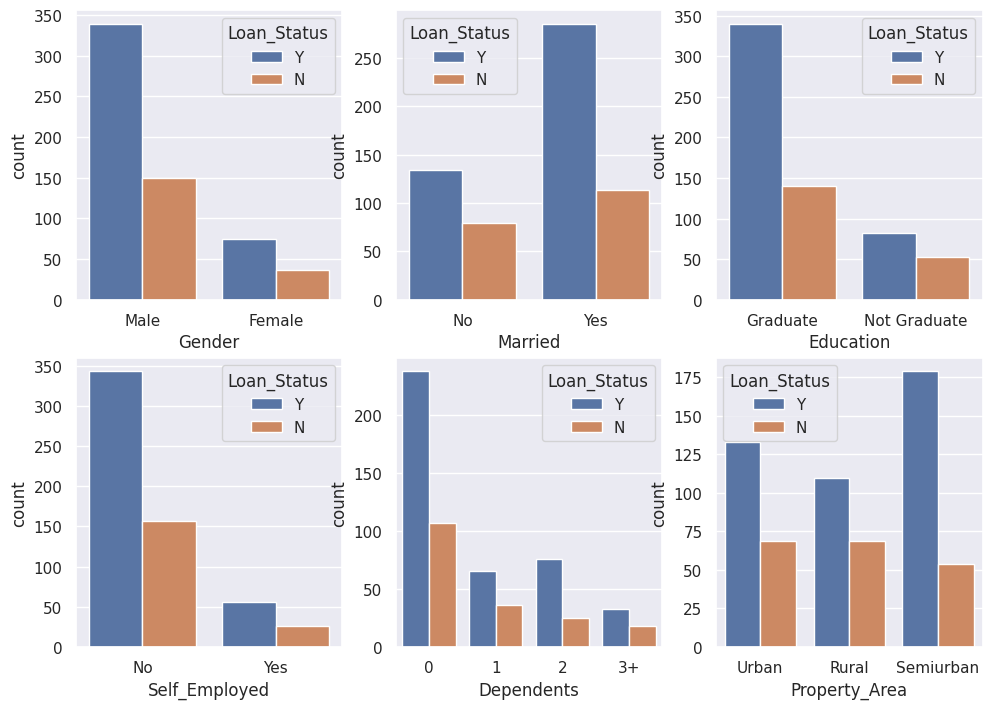

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=Train)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=Train)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=Train)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=Train)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=Train)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=Train)

# Conclusiones

No hay una diferencia sustancial entre las tasas de aprobación de hombres y mujeres.
Los solicitantes casados ​​tienen posibilidades ligeramente más altas de aprobación del préstamo.
Los graduados tienen mayores posibilidades de aprobación de préstamos en comparación con los no graduados.
No hay una diferencia sustancial en las tasas de aprobación de préstamos para autónomos y no autónomos.
Los solicitantes sin dependientes o con 2 dependientes tienen mayores posibilidades de aprobación. Pero esto no se correlaciona bien.
Los solicitantes con propiedades en áreas semiurbanas tienen tasas de aprobación de préstamos más altas.

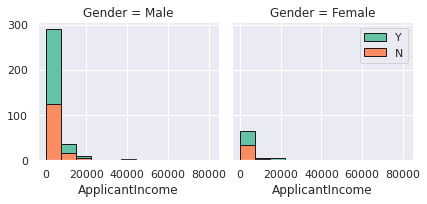

In [ ]:
bins = np.linspace(Train.ApplicantIncome.min(), Train.ApplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

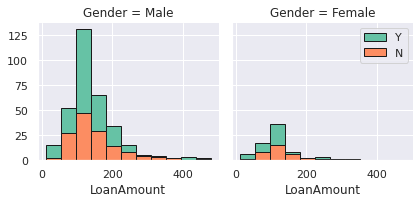

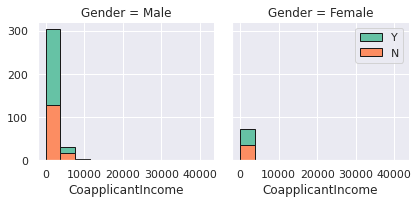

In [ ]:
bins = np.linspace(Train.Loan_Amount_Term.min(), Train.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(Train.CoapplicantIncome.min(), Train.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

# Conclusiones

Las mujeres con ingresos superiores a 7000 tienen mayores posibilidades de aprobación del préstamo

Las mujeres parecen prestar menos cantidad que los hombres

El ingreso de los solicitantes para las candidatas es menor en comparación con los hombres. Sin embargo, no refleja mucho sobre el estado del préstamo.

#Taller
1. Desarrollar mas plots with other predictors such as married, self_employed, property_area etc.

2. Hacer lo mismo con test


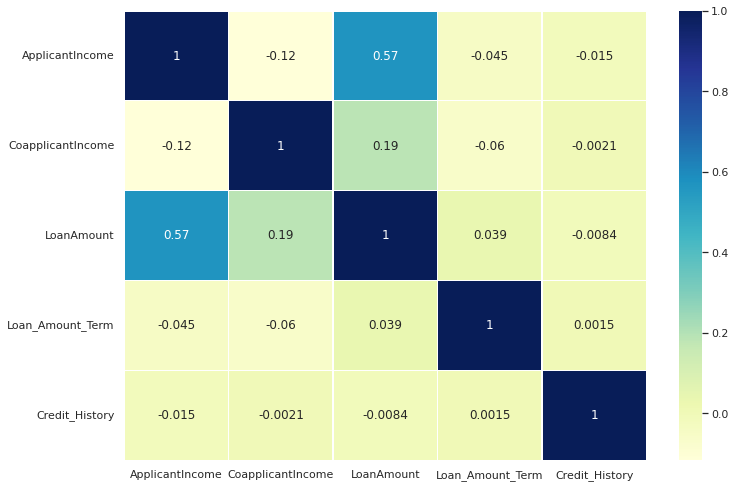

In [ ]:
correlation_mat = Train.corr()

sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")


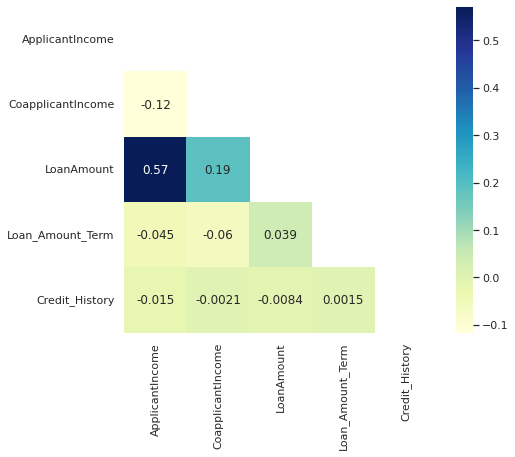

In [ ]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

# Conclusiones

Existe una correlación positiva entre ApplicantIncome y LoanAmount, CoapplicantIncome y LoanAmount.

In [ ]:

# Based on: https://towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8